# **Data Preprocessing & Exploration**

## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Importing the dataset

In [ ]:
df = pd.read_csv('ABBREV.csv')

## Data Preprocessing & EDA


### Data cleaning

In [ ]:
# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
index                   0
NDB_No                  0
Shrt_Desc               0
Water_(g)               1
Energ_Kcal              0
Protein_(g)             0
Lipid_Tot_(g)           0
Ash_(g)               325
Carbohydrt_(g)          0
Fiber_TD_(g)          594
Sugar_Tot_(g)        1832
Calcium_(mg)          348
Iron_(mg)             144
Magnesium_(mg)        739
Phosphorus_(mg)       579
Potassium_(mg)        426
Sodium_(mg)            83
Zinc_(mg)             706
Copper_mg)           1257
Manganese_(mg)       2160
Selenium_(µg)        1700
Vit_C_(mg)            818
Thiamin_(mg)          634
Riboflavin_(mg)       616
Niacin_(mg)           637
Panto_Acid_mg)       2242
Vit_B6_(mg)           905
Folate_Tot_(µg)      1261
Folic_Acid_(µg)      2039
Food_Folate_(µg)     1768
Folate_DFE_(µg)      2057
Choline_Tot_ (mg)    4016
Vit_B12_(µg)         1193
Vit_A_IU              711
Vit_A_RAE            1535
Retinol_(µg)         1806
Alpha_Carot_(µg)     3258
Beta_C

In [ ]:
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
# Validate cleaning process
print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
index                   0
NDB_No                  0
Shrt_Desc               0
Water_(g)               0
Energ_Kcal              0
Protein_(g)             0
Lipid_Tot_(g)           0
Ash_(g)                 0
Carbohydrt_(g)          0
Fiber_TD_(g)            0
Sugar_Tot_(g)           0
Calcium_(mg)            0
Iron_(mg)               0
Magnesium_(mg)          0
Phosphorus_(mg)         0
Potassium_(mg)          0
Sodium_(mg)             0
Zinc_(mg)               0
Copper_mg)              0
Manganese_(mg)          0
Selenium_(µg)           0
Vit_C_(mg)              0
Thiamin_(mg)            0
Riboflavin_(mg)         0
Niacin_(mg)             0
Panto_Acid_mg)          0
Vit_B6_(mg)             0
Folate_Tot_(µg)         0
Folic_Acid_(µg)         0
Food_Folate_(µg)        0
Folate_DFE_(µg)         0
Choline_Tot_ (mg)       0
Vit_B12_(µg)            0
Vit_A_IU                0
Vit_A_RAE               0
Retinol_(µg)            0
Alpha_Carot_(µg)        0
Beta_Ca

In [ ]:
#  Drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#  Drop useless coloumns
df.drop(columns=['index','NDB_No', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2', 'GmWt_Desc2', 'Refuse_Pct'], inplace=True)
print(df.head())

                Shrt_Desc  Water_(g)  Energ_Kcal  Protein_(g)  Lipid_Tot_(g)  \
0        BUTTER,WITH SALT      15.87         717         0.85          81.11   
1  BUTTER,WHIPPED,W/ SALT      16.72         718         0.49          78.30   
2    BUTTER OIL,ANHYDROUS       0.24         876         0.28          99.48   
3             CHEESE,BLUE      42.41         353        21.40          28.74   
4            CHEESE,BRICK      41.11         371        23.24          29.68   

   Ash_(g)  Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  Calcium_(mg)  ...  \
0     2.11            0.06           0.0           0.06          24.0  ...   
1     1.62            2.87           0.0           0.06          23.0  ...   
2     0.00            0.00           0.0           0.00           4.0  ...   
3     5.11            2.34           0.0           0.50         528.0  ...   
4     3.18            2.79           0.0           0.51         674.0  ...   

   Lycopene_(µg)  Lut+Zea_ (µg)  Vit_E_(mg)  Vit_D

#### Removing outliers

In [ ]:
from scipy import stats
import numpy as np

numeric_columns = df.select_dtypes(include=[np.number]).columns

for x in numeric_columns:
    z = np.abs(stats.zscore(df[x]))
    out = np.where(z > 3)[0]
    print(f"Outliers in {x}: {out}")


Outliers in Water_(g): []
Outliers in Energ_Kcal: [   2  633  634  652  653  654  655  656  657  658  659  660  661  662
  676  677  678  679  680  681  682  683  684  685  686  687  688  689
  690  691  692  693  694  696  697  698  699  700  701  702  703  704
  705  706  707  708  709  710  711  712  713  714  715  716  717  718
  719  721  722  723  724  725  726  727  728  729  730  734  735  741
  760  761  762  763  764  765  766  767  768  769  770  771  773  774
  775  776  777  778  779  780  781  783  784  786  787  793  794  797
  810  811  812  813  814  819 2482 2582 2615 2694 3796 8297 8301 8329
 8352 8353 8355 8387 8442 8605 8627 8771]
Outliers in Protein_(g): [ 121  122  123  124  130  151  190  191  216 3305 3611 3612 3623 3630
 4144 4146 4163 4171 4172 4481 4499 4655 4836 4847 4853 4854 4855 4857
 4858 4864 5008 5009 5014 6081 6204 6358 6388 6389 8292 8314 8316 8327
 8347 8390 8391 8394 8400 8404 8409 8413 8418 8783]
Outliers in Lipid_Tot_(g): [   0    1    2  125  1

### EDA

In [ ]:
print("Number of Rows and Columns:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\nSummary Statistics for Numerical Columns:")
print(df.describe())

Number of Rows and Columns:
Rows: 8790, Columns: 47

Summary Statistics for Numerical Columns:
         Water_(g)   Energ_Kcal  Protein_(g)  Lipid_Tot_(g)      Ash_(g)  \
count  8790.000000  8790.000000  8790.000000    8790.000000  8790.000000   
mean     54.113238   226.317634    11.342849      10.553725     1.761895   
std      30.771252   169.877539    10.530474      15.814842     2.950589   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%      29.717500    91.000000     2.380000       0.950000     0.870000   
50%      63.080000   191.000000     8.000000       5.140000     1.200000   
75%      77.960000   337.000000    19.880000      13.720000     2.020000   
max     100.000000   902.000000    88.320000     100.000000    99.800000   

       Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  Calcium_(mg)    Iron_(mg)  \
count     8790.000000   8790.000000    8790.000000   8790.000000  8790.000000   
mean        22.127710      2.086928       7.146022     74.

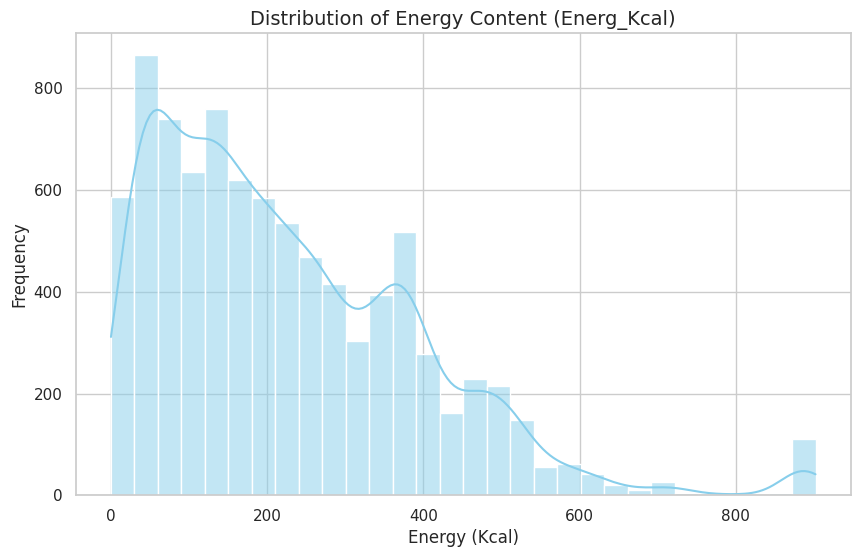

In [ ]:
# Setting up the visualization style
sns.set(style="whitegrid")

# Question 1: Distribution of energy content (Energ_Kcal)
plt.figure(figsize=(10, 6))
sns.histplot(df['Energ_Kcal'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Energy Content (Energ_Kcal)', fontsize=14)
plt.xlabel('Energy (Kcal)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

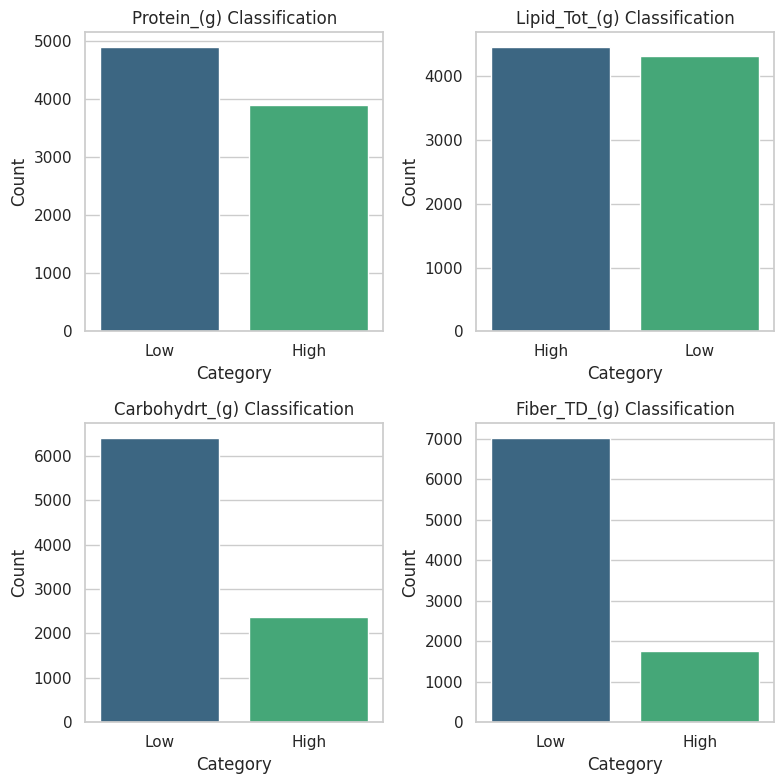

In [ ]:
# Question 2: Macronutrient distribution analysis

# Nutrient thresholds -just some domain knowledge, average amount in foods.
thresholds = {'Protein_(g)': 10, 'Lipid_Tot_(g)': 5, 'Carbohydrt_(g)': 30, 'Fiber_TD_(g)': 3}

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for i, (nutrient, threshold) in enumerate(thresholds.items()):
    temp_class = df[nutrient].apply(lambda x: 'Low' if x < threshold else 'High' if pd.notna(x) else None)
    counts = temp_class.value_counts()

    # Plot the data
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i // 2, i % 2], hue=counts.index, palette="viridis", legend=False)
    axes[i // 2, i % 2].set(title=f'{nutrient} Classification', xlabel='Category', ylabel='Count')

plt.tight_layout()
plt.show()

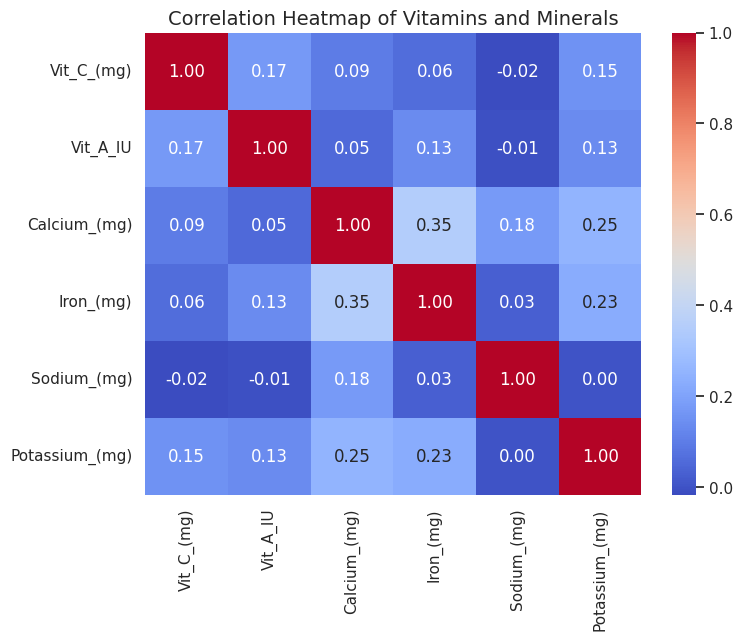

In [ ]:
#Question 3: How are vitamins and minerals correlated with each other?

# Select vitamins and minerals for correlation analysis
correlation_features = ['Vit_C_(mg)', 'Vit_A_IU', 'Calcium_(mg)', 'Iron_(mg)', 'Sodium_(mg)', 'Potassium_(mg)']
correlation_matrix = df[correlation_features].corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Vitamins and Minerals', fontsize=14)
plt.show()

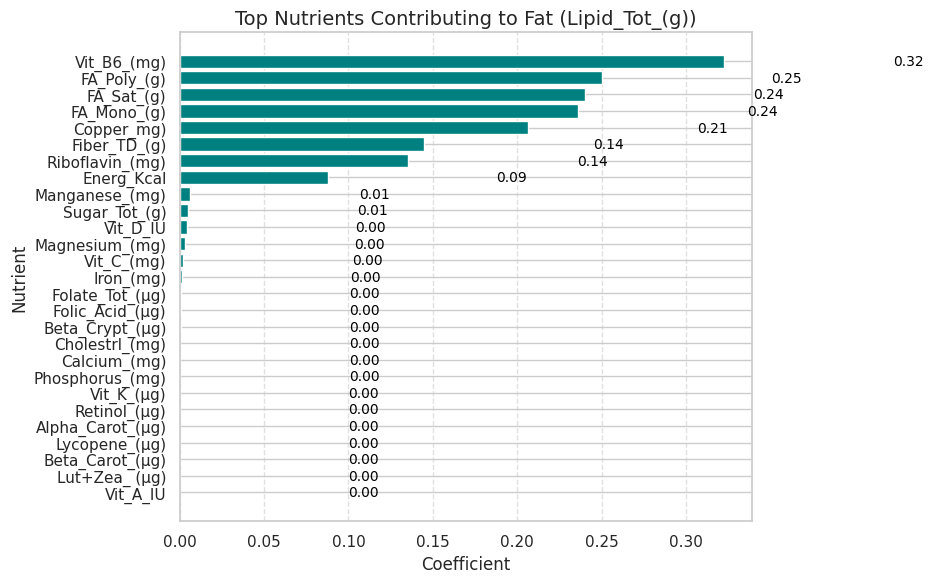

Mean Absolute Error: 0.6649695675636391
Mean Squared Error: 3.2586522043457937
Coefficients (Nutrient Importance):
                  Coefficient
Vit_A_IU             0.000006
Lut+Zea_ (µg)        0.000008
Beta_Carot_(µg)      0.000015
Lycopene_(µg)        0.000029
Alpha_Carot_(µg)     0.000032
Retinol_(µg)         0.000043
Vit_K_(µg)           0.000068
Phosphorus_(mg)      0.000129
Calcium_(mg)         0.000220
Cholestrl_(mg)       0.000388
Beta_Crypt_(µg)      0.000475
Folic_Acid_(µg)      0.000483
Folate_Tot_(µg)      0.000499
Iron_(mg)            0.001205
Vit_C_(mg)           0.001875
Magnesium_(mg)       0.003303
Vit_D_IU             0.004208
Sugar_Tot_(g)        0.005067
Manganese_(mg)       0.006036
Energ_Kcal           0.087708
Riboflavin_(mg)      0.135364
Fiber_TD_(g)         0.144760
Copper_mg)           0.206519
FA_Mono_(g)          0.236233
FA_Sat_(g)           0.240091
FA_Poly_(g)          0.250213
Vit_B6_(mg)          0.322756


In [ ]:
# Question 4: Which nutrients have the greatest impact on fat value? Linear Regression.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

nutrients = ['Energ_Kcal', 'Protein_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)',
             'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)', 'Phosphorus_(mg)', 'Potassium_(mg)',
             'Sodium_(mg)', 'Zinc_(mg)', 'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)',
             'Vit_C_(mg)', 'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
             'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)', 'Folate_DFE_(µg)',
             'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU', 'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)',
             'Beta_Carot_(µg)', 'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
             'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)', 'FA_Poly_(g)', 'Cholestrl_(mg)']

X = df[nutrients]
y = df['Lipid_Tot_(g)']

X = X.dropna()
y = y[X.index]

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

coef_df = pd.DataFrame(model.coef_, index=nutrients, columns=['Coefficient'])
coef_df = coef_df[coef_df['Coefficient'] > 0]
coef_df = coef_df.sort_values(by='Coefficient', ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(coef_df.index, coef_df['Coefficient'], color='teal')
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='left', color='black', fontsize=10)

plt.title('Top Nutrients Contributing to Fat (Lipid_Tot_(g))', fontsize=14)
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Nutrient', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Coefficients (Nutrient Importance):')
print(coef_df)

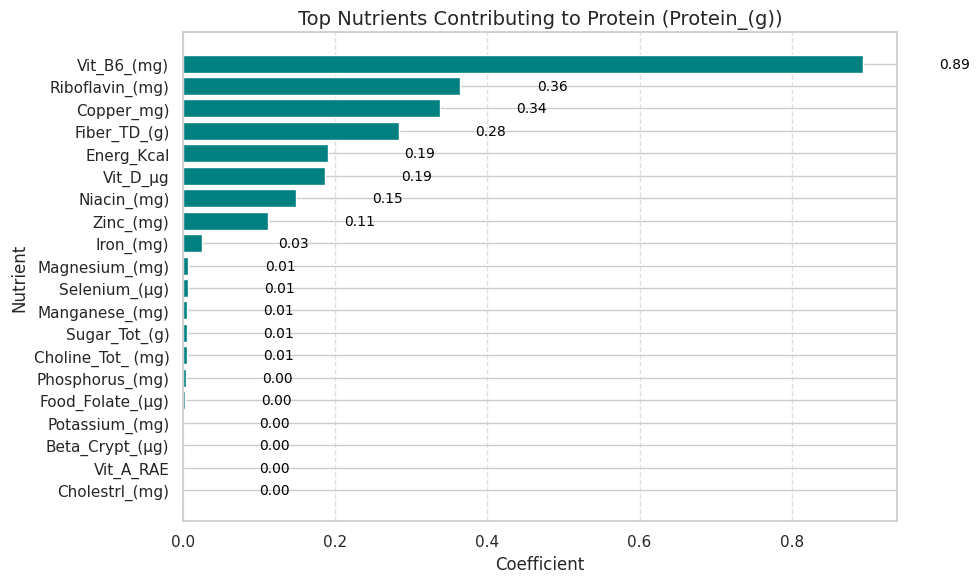

Mean Absolute Error: 1.543892949098303
Mean Squared Error: 15.313157014313667
Coefficients (Nutrient Importance):
                   Coefficient
Cholestrl_(mg)        0.000217
Vit_A_RAE             0.000279
Beta_Crypt_(µg)       0.000922
Potassium_(mg)        0.001102
Food_Folate_(µg)      0.003045
Phosphorus_(mg)       0.004166
Choline_Tot_ (mg)     0.005101
Sugar_Tot_(g)         0.005193
Manganese_(mg)        0.005315
Selenium_(µg)         0.007172
Magnesium_(mg)        0.007684
Iron_(mg)             0.025972
Zinc_(mg)             0.111521
Niacin_(mg)           0.148734
Vit_D_µg              0.186637
Energ_Kcal            0.191449
Fiber_TD_(g)          0.284600
Copper_mg)            0.338519
Riboflavin_(mg)       0.364862
Vit_B6_(mg)           0.893968


In [ ]:
# Question 5: Which nutrients have the greatest impact on protien value? Linear Regression.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

nutrients = ['Energ_Kcal', 'Lipid_Tot_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)',
             'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)', 'Phosphorus_(mg)', 'Potassium_(mg)',
             'Sodium_(mg)', 'Zinc_(mg)', 'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)',
             'Vit_C_(mg)', 'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
             'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)', 'Folate_DFE_(µg)',
             'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU', 'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)',
             'Beta_Carot_(µg)', 'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
             'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)', 'FA_Poly_(g)', 'Cholestrl_(mg)']

X = df[nutrients]
y = df['Protein_(g)']

X = X.dropna()
y = y[X.index]

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression 
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

coef_df = pd.DataFrame(model.coef_, index=nutrients, columns=['Coefficient'])
coef_df = coef_df[coef_df['Coefficient'] > 0]
coef_df = coef_df.sort_values(by='Coefficient', ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(coef_df.index, coef_df['Coefficient'], color='teal')
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='left', color='black', fontsize=10)

plt.title('Top Nutrients Contributing to Protein (Protein_(g))', fontsize=14)
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Nutrient', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Coefficients (Nutrient Importance):')
print(coef_df)

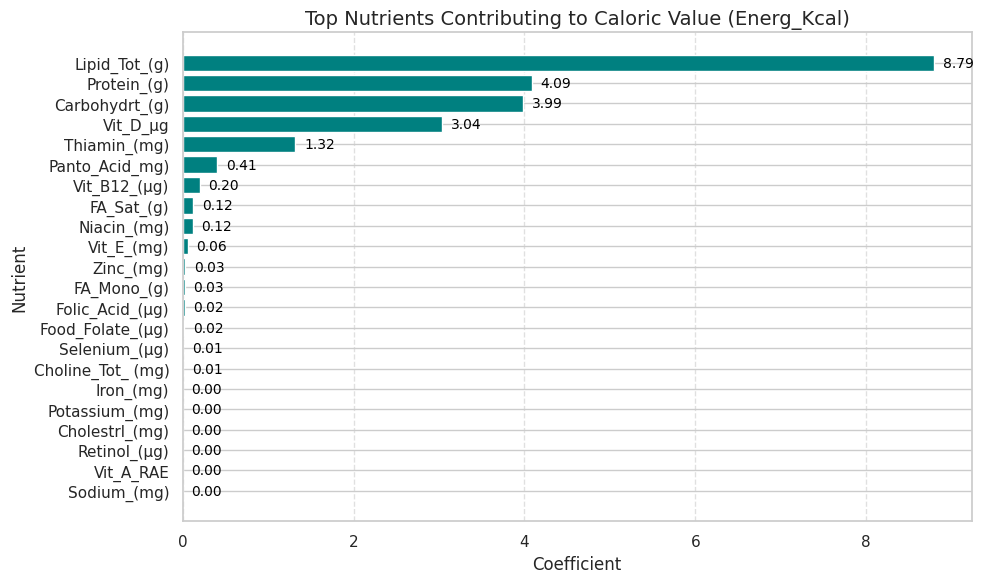

Mean Absolute Error: 6.682451172478271
Mean Squared Error: 361.4453767451514
Coefficients (Nutrient Importance):
                   Coefficient
Sodium_(mg)           0.000091
Vit_A_RAE             0.000370
Retinol_(µg)          0.000717
Cholestrl_(mg)        0.001088
Potassium_(mg)        0.001206
Iron_(mg)             0.001866
Choline_Tot_ (mg)     0.005877
Selenium_(µg)         0.006047
Food_Folate_(µg)      0.019189
Folic_Acid_(µg)       0.024625
FA_Mono_(g)           0.027812
Zinc_(mg)             0.032918
Vit_E_(mg)            0.059120
Niacin_(mg)           0.119471
FA_Sat_(g)            0.123707
Vit_B12_(µg)          0.201377
Panto_Acid_mg)        0.406622
Thiamin_(mg)          1.320739
Vit_D_µg              3.039597
Carbohydrt_(g)        3.989040
Protein_(g)           4.090791
Lipid_Tot_(g)         8.794564


In [ ]:
# Question 6: Which nutrients have the greatest impact on caloric value? Linear Regression.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

nutrients = ['Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)',
             'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)', 'Phosphorus_(mg)', 'Potassium_(mg)',
             'Sodium_(mg)', 'Zinc_(mg)', 'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)',
             'Vit_C_(mg)', 'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
             'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)', 'Folate_DFE_(µg)',
             'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU', 'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)',
             'Beta_Carot_(µg)', 'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
             'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)', 'FA_Poly_(g)', 'Cholestrl_(mg)']

X = df[nutrients]
y = df['Energ_Kcal']

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

coef_df = pd.DataFrame(model.coef_, index=nutrients, columns=['Coefficient'])
coef_df = coef_df[coef_df['Coefficient'] > 0]
coef_df = coef_df.sort_values(by='Coefficient', ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(coef_df.index, coef_df['Coefficient'], color='teal')
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='left', color='black', fontsize=10)

plt.title('Top Nutrients Contributing to Caloric Value (Energ_Kcal)', fontsize=14)
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Nutrient', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Coefficients (Nutrient Importance):')
print(coef_df)


# **Food Recommendations & Calorie Prediction System**

## Calorie Prediction

### Feature Selection

**Calorie Prediction Based on Nutrional Features**

We will estimate Calories based on these Nutritional features:




1.   Water
2.   Protein
3.   Lipid
4.   Carbohydrate
5.   Fiber
6.   Sugar

In [ ]:
df2=pd.read_csv('ABBREV.csv')

df_Features = df2[['Shrt_Desc', 'Water_(g)', 'Energ_Kcal',
                   'Protein_(g)', 'Lipid_Tot_(g)',
                   'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)']]

In [ ]:
print(df_Features.isnull().sum())

Shrt_Desc            0
Water_(g)            1
Energ_Kcal           0
Protein_(g)          0
Lipid_Tot_(g)        0
Carbohydrt_(g)       0
Fiber_TD_(g)       594
Sugar_Tot_(g)     1832
dtype: int64


In [ ]:
df_Features = df_Features.dropna()

### Data Split

'X' are the features that will be predicting, 'y' is the target variable

In [ ]:
y = df_Features['Energ_Kcal']
X = df_Features[['Water_(g)', 'Protein_(g)', 'Lipid_Tot_(g)',
                 'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)']]

### Best Model Selection

Here we choose the **Random Forest Regressor** for its ability to handle the complex, non-linear relationships between nutritional features and calorie content. It works well with the diverse nutritional data and provides accurate predictions while minimizing overfitting.
It has the lowest Mean Squared Error (MSE) of 164.6379 and the smallest Root Mean Squared Error (RMSE) at 12.8311. With an R² score of 0.9939, it explains the most variance in the data compared to the other models. Other models like Gradient Boosting and Linear Regression also perform well but their error rates are slightly higher.

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Initializing Models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []

for model_name, model in models.items():
    # Perform k-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation

    # Train the model on the whole training set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics for the test set
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Average MSE from cross-validation
    avg_cv_mse = -cv_scores.mean()

    results.append({
        "Model": model_name,
        "Test MSE": mse,
        "Test MAE": mae,
        "Test RMSE": rmse,
        "Test R²": r2,
        "CV MSE (avg)": avg_cv_mse
    })

results_df = pd.DataFrame(results)

# Metrics
print("Evaluation Results for Each Model:\n")
for model in results:
    print(f"Model: {model['Model']}")
    print(f"Average MSE (from CV): {model['CV MSE (avg)']:.4f}")
    print(f"Mean Absolute Error (MAE) - Test: {model['Test MAE']:.4f}")
    print(f"Root Mean Squared Error (RMSE) - Test: {model['Test RMSE']:.4f}")
    print(f"R² Score - Test: {model['Test R²']:.4f}")
    print("-" * 40)

Evaluation Results for Each Model:

Model: Random Forest
Average MSE (from CV): 171.2998
Mean Absolute Error (MAE) - Test: 5.8075
Root Mean Squared Error (RMSE) - Test: 12.8311
R² Score - Test: 0.9939
----------------------------------------
Model: Gradient Boosting
Average MSE (from CV): 259.9353
Mean Absolute Error (MAE) - Test: 7.9505
Root Mean Squared Error (RMSE) - Test: 14.8129
R² Score - Test: 0.9919
----------------------------------------
Model: Linear Regression
Average MSE (from CV): 234.7525
Mean Absolute Error (MAE) - Test: 6.1610
Root Mean Squared Error (RMSE) - Test: 13.2458
R² Score - Test: 0.9935
----------------------------------------
Model: K-Nearest Neighbors
Average MSE (from CV): 222.3622
Mean Absolute Error (MAE) - Test: 7.3531
Root Mean Squared Error (RMSE) - Test: 14.6616
R² Score - Test: 0.9920
----------------------------------------


Bar Chart Metrics Visualization

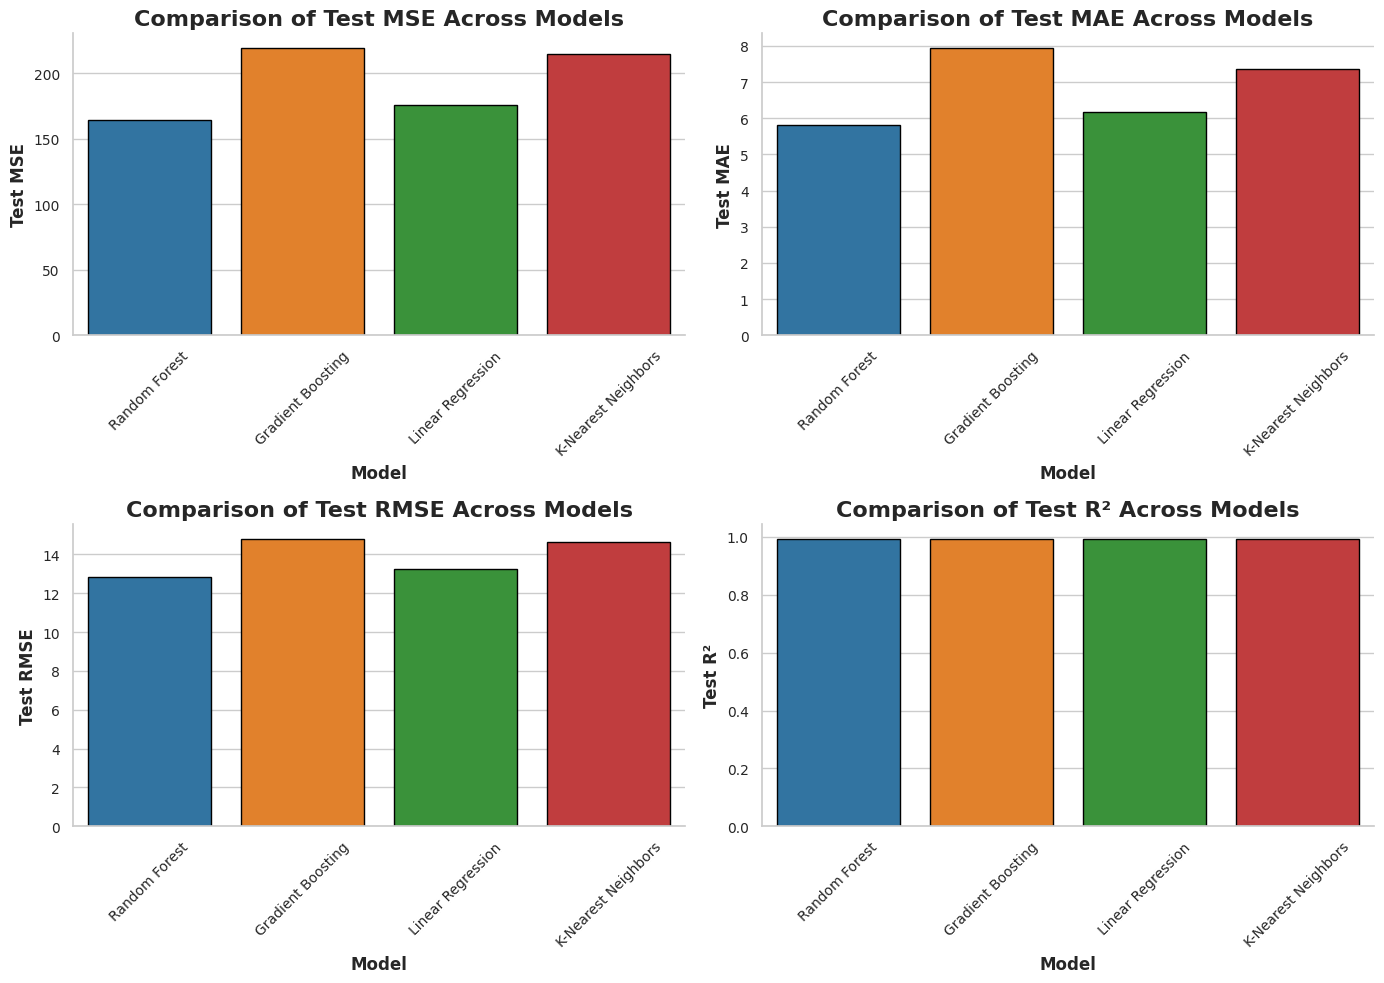

In [ ]:
metrics = ["Test MSE", "Test MAE", "Test RMSE", "Test R²"]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

model_colors = {
    "Random Forest": "#1F77B4",
    "Gradient Boosting": "#FF7F0E",
    "Linear Regression": "#2CA02C",
    "K-Nearest Neighbors": "#D62728"
}

for ax, metric in zip(axes.flatten(), metrics):
    sns.barplot(x="Model", y=metric, data=results_df, ax=ax, hue="Model", palette=model_colors, dodge=False, edgecolor="black")
    ax.set_title(f"Comparison of {metric} Across Models", fontsize=16, fontweight='bold')
    ax.set_ylabel(metric, fontsize=12, fontweight='bold')
    ax.set_xlabel("Model", fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### Function to make prediction using Random Forest

In [ ]:
def make_calorie_prediction():
    rf_model = models["Random Forest"]
    print("Enter the feature values for prediction:")

    water = float(input("Water (g): "))
    protein = float(input("Protein (g): "))
    lipid = float(input("Lipid Total (g): "))
    carbohydrate = float(input("Carbohydrate (g): "))
    fiber = float(input("Fiber (g): "))
    sugar = float(input("Sugar Total (g): "))

    user_input = pd.DataFrame([[water, protein, lipid, carbohydrate, fiber, sugar]],
                              columns=['Water_(g)', 'Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)'])

    prediction = rf_model.predict(user_input)

    print(f"The predicted energy (calories) is: {prediction[0]} kcal")

## Food Recommendation

### Optimal number of clusters

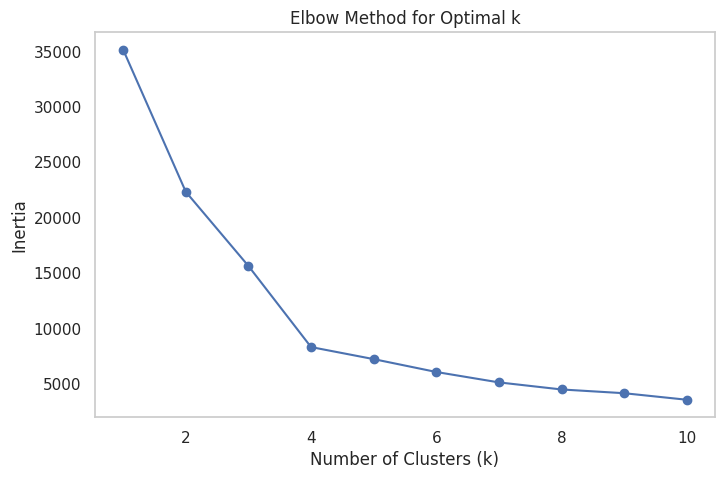

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting relevant columns for clustering
nutritional_data = df[['Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)','Carbohydrt_(g)']].dropna()

# Normalizing the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(nutritional_data)

# Elbow Method to determine the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


### K-means Clustering and Visualization

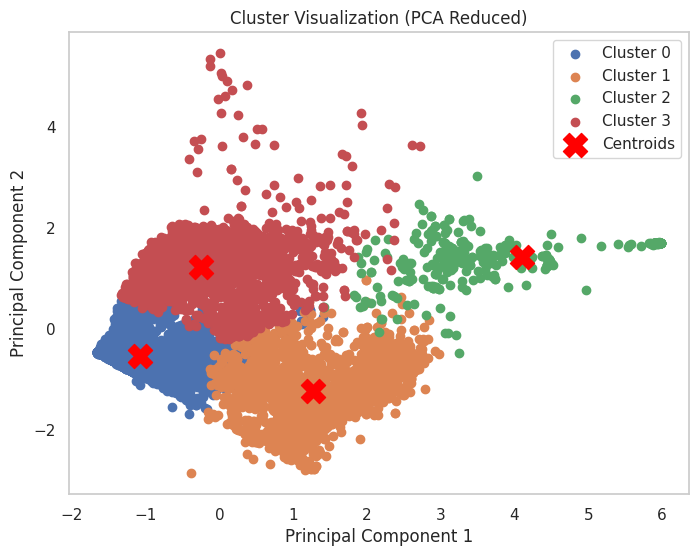

,Shrt_Desc,Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Cluster
0,"BUTTER,WITH SALT",717,0.85,81.11,0.06,2
1,"BUTTER,WHIPPED,W/ SALT",718,0.49,78.30,2.87,2
2,"BUTTER OIL,ANHYDROUS",876,0.28,99.48,0.00,2
3,"CHEESE,BLUE",353,21.40,28.74,2.34,3
4,"CHEESE,BRICK",371,23.24,29.68,2.79,3


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

# Load the dataset
df = pd.read_csv('ABBREV.csv')

# Select relevant columns for clustering
selected_columns = ['Shrt_Desc', 'Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)']
food_data = df[selected_columns].dropna().copy()

# Normalize the numerical data (Protein, Lipid_Tot, Carbohydrate, and Energy)
scaler = StandardScaler()
nutrients_scaled = scaler.fit_transform(food_data[['Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)']])

# Apply K-Means clustering
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(nutrients_scaled)

# Cleaned data with cluster labels added
food_data['Cluster'] = kmeans.labels_

# Save the dataset with cluster labels
food_data.to_csv('Food_Clusters.csv', index=False)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(nutrients_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(4):
    cluster_data = reduced_data[kmeans.labels_ == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

# Mark cluster centroids
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=300,
    c='red',
    marker='X',
    label='Centroids'
)

# Title and labels
plt.title('Cluster Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

# Display the first few rows of the dataset with cluster labels
display(food_data.head())

### Function to get user input either from category or custom preference, scale it and predict cluster

In [ ]:
def get_scaled_user_input():
    nutrients = ['Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)']

    # Categories and their nutrient ranges
    nutrient_ranges = {
        'high': food_data[nutrients].quantile(0.75),
        'medium': food_data[nutrients].quantile(0.5),
        'low': food_data[nutrients].quantile(0.25),}

    # Map categories
    categories = {
        'gain muscle': {
            'Energ_Kcal': nutrient_ranges['high']['Energ_Kcal'],
            'Protein_(g)': nutrient_ranges['high']['Protein_(g)'],
            'Lipid_Tot_(g)': nutrient_ranges['medium']['Lipid_Tot_(g)'],
            'Carbohydrt_(g)': nutrient_ranges['medium']['Carbohydrt_(g)'],
        },
        'lose weight': {
            'Energ_Kcal': nutrient_ranges['low']['Energ_Kcal'],
            'Protein_(g)': nutrient_ranges['medium']['Protein_(g)'],
            'Lipid_Tot_(g)': nutrient_ranges['low']['Lipid_Tot_(g)'],
            'Carbohydrt_(g)': nutrient_ranges['low']['Carbohydrt_(g)'],
        },
        'maintain weight': {
            'Energ_Kcal': nutrient_ranges['medium']['Energ_Kcal'],
            'Protein_(g)': nutrient_ranges['medium']['Protein_(g)'],
            'Lipid_Tot_(g)': nutrient_ranges['medium']['Lipid_Tot_(g)'],
            'Carbohydrt_(g)': nutrient_ranges['medium']['Carbohydrt_(g)'],
        }}

    # User chooses Category or Custom Preference
    while True:
        print("\nChoose your preference:\n1. Choose Category\n2. Custom Preferences\n3. Exit")
        choice = input("Enter 1, 2, or 3: ").strip()

        if choice == '1':
            print("\nSelect a category:")
            for i, category in enumerate(categories, 1):
                print(f"{i}. {category}")
            try:
                category_choice = int(input("Enter the number of your chosen category: ").strip())
                if 1 <= category_choice <= len(categories):
                    user_input = categories[list(categories.keys())[category_choice - 1]]
                    break
                else:
                    print("Invalid category number. Please try again.")
            except ValueError:
                print("Invalid input. Please enter a valid number.")

        elif choice == '2':
            user_input = {}
            for nutrient in nutrients:
                while True:
                    try:
                        user_input[nutrient] = float(input(f"Enter desired {nutrient.replace('_', ' ').lower()}: "))
                        break
                    except ValueError:
                        print("Invalid input. Please enter a numeric value.")
            break

        elif choice == '3':
            print("Exiting the system.")
            return None, None

        else:
            print("Invalid choice. Please enter 1, 2, or 3.")

    # Convert user input to DataFrame and scale
    user_input_df = pd.DataFrame([user_input], columns=nutrients)
    user_input_scaled = scaler.transform(user_input_df)

    # Predict the cluster for the user input
    predicted_cluster = kmeans.predict(user_input_scaled)[0]

    return user_input_scaled, predicted_cluster

### Function to calculate similarity and recommend foods

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
def get_food_recommendations(user_input_scaled, predicted_cluster, food_data):
  # Ensure the input data has the required structure
    if 'Cluster' not in food_data.columns:
        raise ValueError("The food_data DataFrame must contain a 'Cluster' column.")

    nutrient_columns = ['Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)']

    # Check if nutrient columns exist in the dataset
    for column in nutrient_columns:
        if column not in food_data.columns:
            raise ValueError(f"The food_data DataFrame must contain the column: {column}")

    # Filter foods based on the predicted cluster
    cluster_foods = food_data[food_data['Cluster'] == predicted_cluster]

    # Select only the nutrient columns for similarity calculation
    cluster_foods_nutrient_data = cluster_foods[nutrient_columns]

    # Calculate similarity scores
    similarities = cosine_similarity(user_input_scaled, cluster_foods_nutrient_data)

    # Add similarity scores to the DataFrame
    cluster_foods = cluster_foods.copy()
    cluster_foods['Similarity'] = similarities[0]

    # Rank foods by similarity
    recommended_items = cluster_foods.sort_values(by='Similarity', ascending=False).head(20)


    return recommended_items

In [ ]:
from sklearn.metrics import silhouette_score

# Calculating the Silhouette Score
silhouette_avg = silhouette_score(nutrients_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.55


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Calculating the Davies-Bouldin Index
db_index = davies_bouldin_score(nutrients_scaled, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index:.2f}")


Davies-Bouldin Index: 0.63


In [ ]:
print(f"Final Inertia Score: {kmeans.inertia_:.2f}")

Final Inertia Score: 8321.44


In [ ]:
# Running KMeans multiple times to check cluster stability
for seed in [0, 42, 99]:
    kmeans_temp = KMeans(n_clusters=4, random_state=seed)
    kmeans_temp.fit(nutrients_scaled)
    print(f"Seed: {seed}, Inertia: {kmeans_temp.inertia_}")

Seed: 0, Inertia: 8321.436399260927
Seed: 42, Inertia: 8321.436399260927
Seed: 99, Inertia: 8321.436399260927


## A **Dynamic System** for Calorie Prediction and Food Recommendations

In [ ]:
from tabulate import tabulate
def main(food_data):
    while True:
        print("\nChoose an option:")
        print("1. Calorie Prediction")
        print("2. Food Recommendation")
        print("3. Exit")
        choice = input("Enter your choice (1/2/3): ")

        if choice == "1":
            make_calorie_prediction()

        elif choice == "2":
            user_input_scaled, predicted_cluster = get_scaled_user_input()
            recommended_items = get_food_recommendations(user_input_scaled, predicted_cluster, food_data)

            # Display the top recommended food items with their nutritional details
            pd.set_option('display.max_colwidth', None)
            print("\nTop Recommended Food Items with Nutritional Details:")
            columns_to_display = ['Shrt_Desc', 'Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)', 'Similarity']
            display(recommended_items[columns_to_display])

        elif choice == "3":
            print("Exiting the program. Goodbye!")
            break

        else:
            print("Invalid choice. Please enter 1, 2, or 3.")

# Run the main function
if __name__ == "__main__":
    main(food_data)


Choose an option:
1. Calorie Prediction
2. Food Recommendation
3. Exit
